### Analítica Computacional para la toma de Decisiones
### Taller 6 - Intro a Redes Neuronales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [3]:
# Cargar los datos
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                        'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

#### Punto 1

In [4]:
# Seleccionar las columnas continuas
X = df[['Displacement', 'Horsepower', 'Weight', 'Acceleration']].values
y = df['MPG'].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo base
model_base = Sequential()
model_base.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_base.add(Dense(32, activation='relu'))
model_base.add(Dense(1))  # Salida para regresión

# Compilar el modelo
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Punto 2

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 582.2710 - val_loss: 671.6844
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 607.6240 - val_loss: 652.4448
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 548.9518 - val_loss: 630.5900
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 529.5988 - val_loss: 604.3341
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 519.6344 - val_loss: 572.9113
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 492.4377 - val_loss: 537.1689
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 446.7408 - val_loss: 496.0635
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 435.8942 - val_loss: 448.6624
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 389.6258 - val_loss: 395.2271
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 330.7708 - val_loss: 337.6545
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 267.9946 - val_loss: 278.9458
Epoch 12/100
8/8 ━━━━━━━━━━━━━

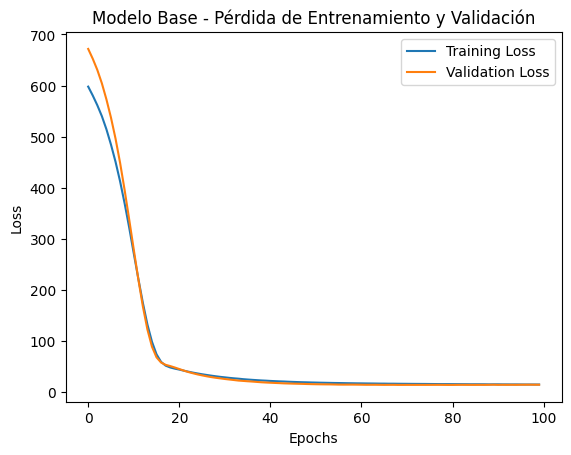

In [5]:
# Entrenar el modelo
history_base = model_base.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Graficar el historial de pérdida
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Modelo Base - Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Punto 3: Modificar el número de neuronas

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 617.6472 - val_loss: 689.5176
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 589.7603 - val_loss: 680.0663
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 586.7033 - val_loss: 670.9263
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 574.9450 - val_loss: 661.2799
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 568.6692 - val_loss: 650.1941
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 560.8379 - val_loss: 636.9532
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 548.9787 - val_loss: 621.3275
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 538.0446 - val_loss: 603.0245
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 514.2883 - val_loss: 581.6274
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 517.4092 - val_loss: 556.6461
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 486.9920 - val_loss: 528.2836
Epoch 12/100
8/8 ━━━━━━━━━━━━━

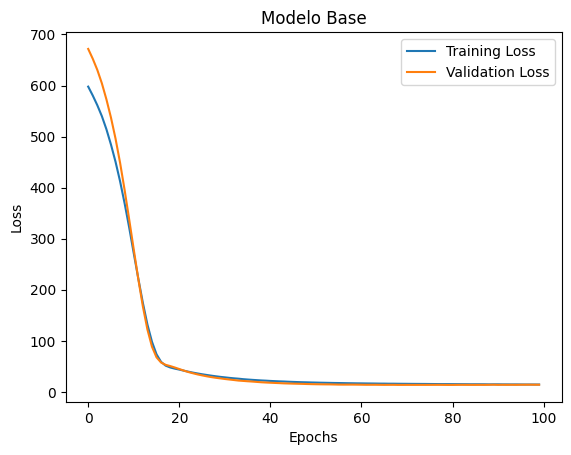

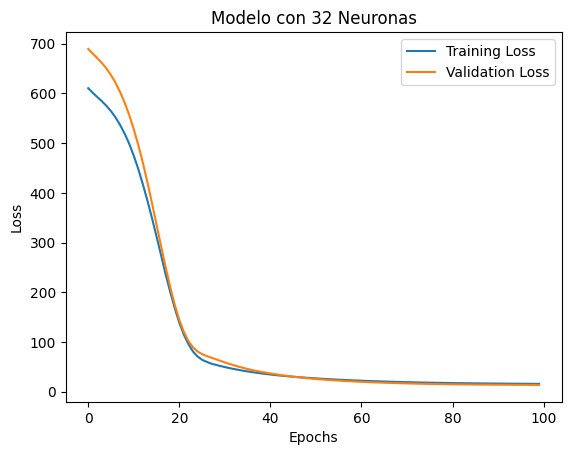

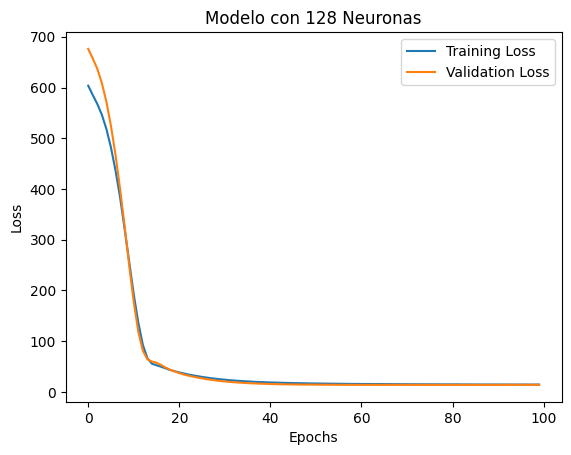

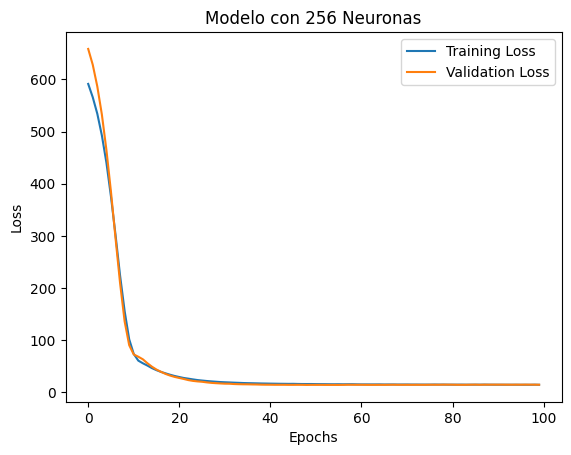

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 16.3309
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.4812 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.2328 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.3373 
Modelo Base - Test Loss: 16.159381866455078
Modelo con 32 Neuronas - Test Loss: 16.936620712280273
Modelo con 128 Neuronas - Test Loss: 16.116352081298828
Modelo con 256 Neuronas - Test Loss: 16.10673713684082
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


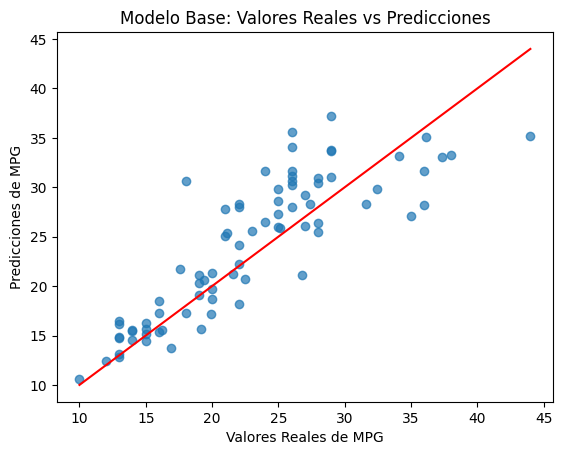

In [8]:
def create_model(neurons):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Caso 1: 32 neuronas
model_32 = create_model(32)
history_32 = model_32.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Caso 2: 128 neuronas
model_128 = create_model(128)
history_128 = model_128.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Caso 3: 256 neuronas
model_256 = create_model(256)
history_256 = model_256.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

def plot_historial_perdida (history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Graficar historial de pérdida para los modelos ajustados
plot_historial_perdida(history_base, 'Modelo Base')
plot_historial_perdida(history_32, 'Modelo con 32 Neuronas')
plot_historial_perdida(history_128, 'Modelo con 128 Neuronas')
plot_historial_perdida(history_256, 'Modelo con 256 Neuronas')

# Evaluar el modelo en el conjunto de prueba
test_loss_base = model_base.evaluate(X_test, y_test)
test_loss_32 = model_32.evaluate(X_test, y_test)
test_loss_128 = model_128.evaluate(X_test, y_test)
test_loss_256 = model_256.evaluate(X_test, y_test)

print(f"Modelo Base - Test Loss: {test_loss_base}")
print(f"Modelo con 32 Neuronas - Test Loss: {test_loss_32}")
print(f"Modelo con 128 Neuronas - Test Loss: {test_loss_128}")
print(f"Modelo con 256 Neuronas - Test Loss: {test_loss_256}")

# Hacer predicciones con los modelos
y_pred_base = model_base.predict(X_test)
y_pred_32 = model_32.predict(X_test)
y_pred_128 = model_128.predict(X_test)
y_pred_256 = model_256.predict(X_test)

def plot_predicciones ( y

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_base, label='Predicciones vs Valores Reales', alpha=0.7)
plt.xlabel('Valores Reales de MPG')
plt.ylabel('Predicciones de MPG')
plt.title('Modelo Base: Valores Reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea perfecta
plt.show()



3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002CE6D55B4C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


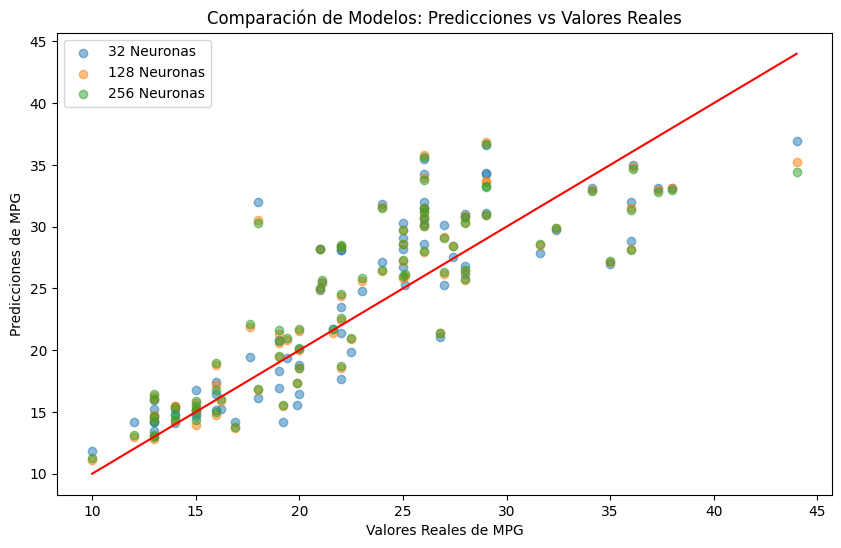

In [10]:
# Hacer predicciones con otros modelos
y_pred_32 = model_32.predict(X_test)
y_pred_128 = model_128.predict(X_test)
y_pred_256 = model_256.predict(X_test)

# Graficar las predicciones de otros modelos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_32, label='32 Neuronas', alpha=0.5)
plt.scatter(y_test, y_pred_128, label='128 Neuronas', alpha=0.5)
plt.scatter(y_test, y_pred_256, label='256 Neuronas', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea perfecta
plt.xlabel('Valores Reales de MPG')
plt.ylabel('Predicciones de MPG')
plt.title('Comparación de Modelos: Predicciones vs Valores Reales')
plt.legend()
plt.show()

#### Punto 4: Modificar el número de capas

In [7]:
def create_model_layers(layers):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(layers):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Caso 1: 2 capas ocultas
model_2_layers = create_model_layers(2)
history_2_layers = model_2_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Caso 2: 3 capas ocultas
model_3_layers = create_model_layers(3)
history_3_layers = model_3_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Caso 3: 4 capas ocultas
model_4_layers = create_model_layers(4)
history_4_layers = model_4_layers.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 593.5757 - val_loss: 662.3179
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 564.8779 - val_loss: 630.9622
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 558.3391 - val_loss: 582.2944
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 493.7869 - val_loss: 504.4427
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 426.5569 - val_loss: 388.9266
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 325.1333 - val_loss: 244.0078
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 197.2659 - val_loss: 118.1307
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 90.4444 - val_loss: 76.0176
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66.3486 - val_loss: 77.5848
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 69.1260 - val_loss: 60.4485
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 60.6769 - val_loss: 51.4586
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 

#### Punto 5: Modificar las funciones de activación

In [ ]:
def create_model_activation(activation):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Caso 1: Activación tanh
model_tanh = create_model_activation('tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Caso 2: Activación sigmoid
model_sigmoid = create_model_activation('sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Caso 3: Activación elu
model_elu = create_model_activation('relu')
history_elu = model_elu.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


#### Punto 6: Proponer dos modelos